# Bank Fraud Detection

Banking fraud has become a major issue for banking and other financial services. Federal Trade Commission statistics show that 2.6 million fraud reports were filed in 2023 alone (FTC, 2024). With scammers finding new ways steal from unsuspecting victims, the financial services industry must find new ways combat fraud. 

This notebook explores a dataset that records banking transactions between accounts and labels each instance as a legitament or fraudulant transaction ([link](https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example)). 

## Exploring the Data

In order to understand the data, several different factors should be considered, such as:
* Structure: how the dataset is defined
* Data Types: what data is contained in each column
* Correlation: how strongly the data points relate to each other
* Frequency: how often values appear in each column

However, before the dataset is explored, it needs to imported: 

In [1]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("fraud_dataset_example.csv")
raw_data = raw_data.drop(columns=["isFlaggedFraud"]) # Drops isFlaggedFraud column

### Structure

Below, the first and last 5 rows of the dataset are displayed: 

In [2]:
raw_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0


The data set has 10 columns and 101,613 rows. Of the columns, 9 are features (what is used to predict) and 1 is the label (what is being predicted). Because the data set has so many rows, it can be split into multiple subsets to train, validate, and test machine learning models. 

### Data Types

Data types are important because they define what kind of data can be stored in a column. Below, the data for each column is displayed: 

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.8+ MB


Each data type is described below and associated columns are described below:

* `int64`: a whole number
    * step: hour of day
    * isFraud: whether or not the transaction was fraudulent
* `float64`: a fractional number
    * amount: how much money was transfered
    * oldbalanceOrg: balance of the sending account before the transaction
    * newbalanceOrig: balance of the sending account after the transaction
    * oldbalanceDest: balance of the receiving account before the transaction
    * newbalanceDest: balance of the receiving account after the transaction
* `object`: a string of text
    * type: what type of transaction occured
    * nameOrig: the name of the new sending account
    * nameDest: the name of the receiving account

Although the `step` column is numeric, it simply describes a time of day, so it will be treated as a categorical variable (belonging to a certain category), along with the `type` column. Outside of the `nameOrig` and `nameDest` columns (addressed below), all other columns are numeric, meaning that they can be tested for correlation in the next section. 

> Because the models built later will need to operate independently of the specific accounts used, the `nameOrig` and `nameDest` columns will not be included in the final dataset. This will help the model generalize to data it has never seen before.

### Correlation

Correlations help visualize relationships between variables. A high positive correlation means that an increase in one variable is generally accompanied by a increase in another variable. A high negative correlation means that an increase in one variable is generally accompanied by a decrease in another variable. 

Before the correlations are shown, all numerical columns in the dataset are seperated into a subset:

In [4]:
num_df = raw_data.select_dtypes(include=["number"]).copy() # Only numeric columns

The correlations between the numeric columns in the dataset are shown below:

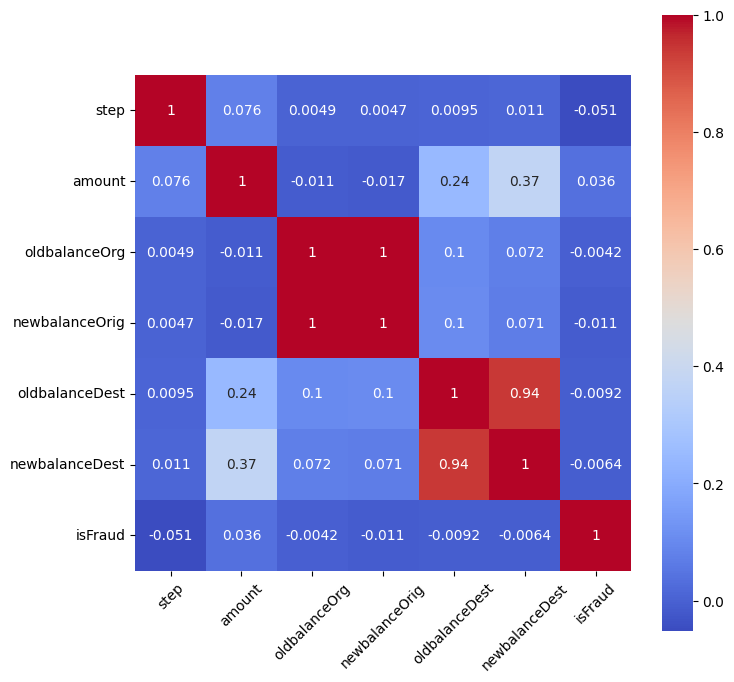

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", square=True)

plt.xticks(rotation=45)
plt.show()

Although the old and new balances of the original account and distination account are highly correlated, the other variables don't seem to have clear correlations between them. 

### Frequency

Frequency of occurence for the values in each column is important because it can help narrow down what range most values fall under. Below, histograms (plots of frequency) are shown for each numerical column except for the `isFraud` column, which is discussed next: 

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>],
       [<Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>]], dtype=object)

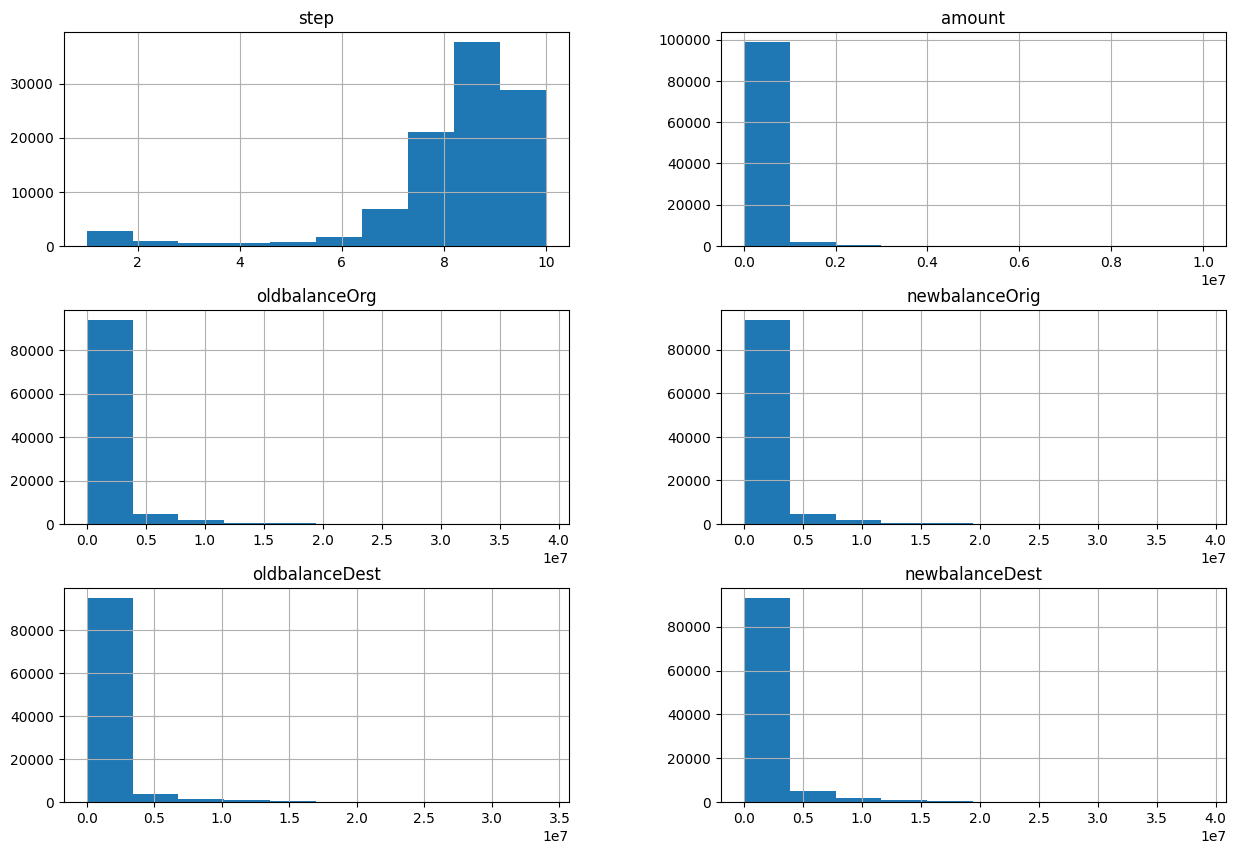

In [6]:
num_df.drop(columns=["isFraud"]).select_dtypes(include=["number"]).hist(figsize=(15, 10)) # 

Because the number of true fraud cases were so small, a chart would not be able to show the frequency in a histogram. Instead, a simple value count is shown below for the `isFraud` column:

In [7]:
val_cnt = num_df["isFraud"].value_counts()
pd.DataFrame([{"No Fraud":"{:,}".format(val_cnt[0]), "Fraud":"{:,}".format(val_cnt[1])}])

,No Fraud,Fraud
0,"101,497",116


This means that over 100,000 transactions were non-fraudulent, with only 116 being fraudulent. The percent of fraud in the dataset is only 0.14%. 

Although this is a good thing (low fraud equates to a better customer experience), it also means that the machine learning models will have less fraud data to be trained on, meaning that fraud could be much harder to detect. This problem can be solved by oversampling the training data.

> Oversampling: the act of duplicating records from an underrepresented class in a dataset so that more instances of that class are present. 

Finally, the `type` column is a categorical column that represents the transaction type. The frequency of the `type` column is shown below:

In [8]:
pd.DataFrame(raw_data["type"].value_counts().apply(lambda x: "{:,}".format(x)))

,count
type,
PAYMENT,"40,062"
CASH_OUT,"31,310"
CASH_IN,"20,540"
TRANSFER,"8,689"
DEBIT,"1,012"


"PAYMENT" is the most common item in the type column, with "CASH_OUT" and "CASH_IN" both appearing in high frequencies. 

## Preparing the Data

Now that the data has been explored, it can be prepared using the insights gained in the previous section. First, the data needs to be split into features (X) and labels (y):

In [9]:
X = raw_data.drop(columns=["isFraud"])
y = raw_data["isFraud"]

Now, the data can be split into training, validation, and testing sets. A random seed is set for reproducibility: 

In [10]:
from sklearn.model_selection import train_test_split
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=random_seed) # train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=random_seed) # train-validation split

### Over-Sampling the Data

As mentioned above, the number of fraud instances in the dataset is small in comparison to the size of the data. Because the `stratify` parameter was set to `y` above, this means that the training, validation, and testing sets have proportional fraud instances in each. Below the percentage of fraud instances for each dataset is show below:

In [11]:
y_train_cnt = np.bincount(y_train)
y_val_cnt = np.bincount(y_val)
y_test_cnt = np.bincount(y_test)

print("Training Set:", y_train_cnt[1] / (y_train_cnt[0] + y_train_cnt[1]))
print("Validation Set:", y_val_cnt[1] / (y_val_cnt[0] + y_val_cnt[1]))
print("Testing Set:", y_test_cnt[1] / (y_test_cnt[0] + y_test_cnt[1]))

Training Set: 0.0011379013408783368
Validation Set: 0.0011686554311723459
Testing Set: 0.0011317226787383753


Each set consists of approximately 0.11% fraud instances. While this is acceptable for the validation and testing sets, the low frequency of fraud in the training set would make it much more difficult for the models to appropriately learn the patterns in the data. Therefore, the training set is oversampled so that the models have a large number of fraud instances to train on:

In [12]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

Now, the number of non-fraud (0) and fraud (1) instances are equal: 

In [13]:
cnt_os = np.bincount(y_train)
print("0s:", cnt_os[0])
print("1s:", cnt_os[1])

0s: 64958
1s: 64958


### Encoding and Scaling the Data

Now that the data has been oversampled, it can be transformed using an ordinal encoder, label binarizer, and standard scaler. Each preprocessor is described below: 

* `OrdinalEncoder`: encodes items that have an order, such as time.
    * `step`
* `LabelBinarizer`: one-hot encodes items so that each value can be represented with a 1 or a 0.
    * `type`
* `StandardScaler`: scales data so that outliers don't have a disproportional effect during model training.
    * `amount`
    * `oldbalanceOrg`
    * `newbalanceOrig`
    * `oldbalanceDest`
    * `newbalanceDest`

Notice that the `X_train` data is used to fit each function so that the encoders/scalers will not fit the validation and testing data:  

In [14]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelBinarizer

num_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

oe = OrdinalEncoder(categories=[[1,2,3,4,5,6,7,8,9,10]]).fit(X_train[["step"]])
lb = LabelBinarizer().fit(X_train["type"])
ss = StandardScaler().fit(X_train[num_cols])

Now that the preprocessors have been fitted to the training data, they can now be used to transoform the datasets. A function to transform the data using the preprocessing functions above is created:

In [15]:
def transform_data(data):
    df = data.copy()

    step_df = pd.DataFrame(oe.transform(df[["step"]]), columns=["step"])
    type_df = pd.DataFrame(lb.transform(df["type"]), columns=[col.lower() for col in lb.classes_])
    num_df = pd.DataFrame(ss.transform(df[num_cols]), columns=num_cols)

    return pd.concat([step_df, type_df, num_df], axis=1)

This function can now be used to transform each set of features:

In [16]:
X_train = transform_data(X_train)
X_val = transform_data(X_val)
X_test = transform_data(X_test)

One final check of the data can be made to ensure that the preprocessing steps had the desired effect on the datasets: 

In [17]:
X_train.head()

,step,cash_in,cash_out,debit,payment,transfer,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9.0,1,0,0,0,0,0.010891,0.222151,0.614249,0.087331,-0.217474
1,8.0,1,0,0,0,0,-0.269912,3.739332,4.602924,0.094459,-0.371248
2,8.0,1,0,0,0,0,-0.297753,1.508966,1.942679,0.175600,-0.211176
3,7.0,1,0,0,0,0,-0.164441,-0.307076,-0.124234,-0.289510,-0.371248
4,8.0,0,0,0,1,0,-0.290938,-0.292294,-0.210442,-0.289510,-0.371248


Now that the data is prepared, it can be used to create machine learning models. 

## Building Models

With data as input and predictions as output, machine learning models can become a valuable tool for detecting fraud. However, in order to measure how well the models preform on a given dataset, performance metrics need to be defined. Below, several performance metrics are imported, explained below: 
* Accuracy Score: the percentage of correctly classified instances among <b>all instances</b>. 
* Precision Score: the percentage of correctly classified positive instances among <b>all positive predictions</b>. 
* Recall Score: the percentage of correctly classified positive instances among <b>all positive instances</b>.
* F1 Score: the harmonic mean of the precision and recall score. 
* Confusion Matrix: a grid showing a model's true positive, false positive, true negative, and false negative predictions. 

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Below, a function is created to display all metrics discussed above. The function can be reused for each model and resulting prediction set: 

In [19]:
def plot_metrics(y_pred):
    print("Accuracy:", round(accuracy_score(y_val, y_pred), 2))
    print("Precision:", round(precision_score(y_val, y_pred), 2))
    print("Recall:", round(recall_score(y_val, y_pred), 2))
    print("F1 Score:", round(f1_score(y_val, y_pred), 2)),

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred), display_labels=[0, 1])
    disp.plot()

Now the training and validation of several models can begin. 

#### Logistic Regression

The first model is a logistic regression classifier. The only hyperparameter that is changed from default is the `max_iter` parameter, because the default value of 100 is too low for such a large dataset: 

Accuracy: 0.93
Precision: 0.02
Recall: 0.95
F1 Score: 0.03


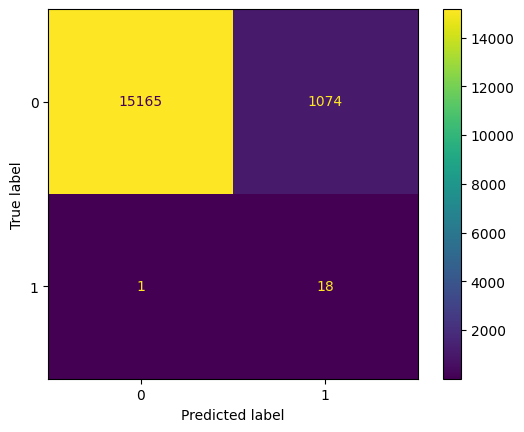

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, random_state=random_seed)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

plot_metrics(y_pred)

The recall of 1 is very good for the problem at hand. This means that nearly every single positive instance was correctly classified as fraud. However, it appears that the model predicted many negative instances as positive (false positives); 6.6% of all negative transactions were predicted to be fraud. This would make the customer experience worse as most of the notifications they would receive about potentially fraudulent activity on their account would be false anomalies. 

Now that the base logistic regression model has been trained, a grid search can be performed to see if the model has room for improvement: 

Accuracy: 0.89
Precision: 0.01
Recall: 0.95
F1 Score: 0.02


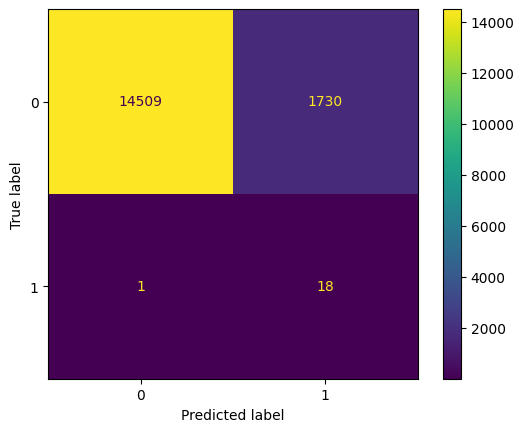

In [21]:
params = {
    "C": np.linspace(0.1, 2, 10),
    "class_weight": [None, {0: 1.0, 1:1.4}]
}

# scorer = make_scorer(recall_score, pos_label=1)  # adjust pos_label as needed
metrics = ["recall", "accuracy"]
lr_grid = GridSearchCV(estimator=LogisticRegression(max_iter=500, random_state=random_seed), param_grid=params, scoring=metrics, refit="recall")

lr_grid.fit(X_train, y_train)
y_pred = lr_grid.predict(X_val)

plot_metrics(y_pred)

Although the recall score remained the same, the number of false positives increased significantly. Overall, the model degraded after the grid search. 

#### Decision Tree

The decision tree classifier is a model that consists of nodes that split decision making into subsets so that the model can make predictions based on feature values. Below, the base decision tree classifier is trained: 

Accuracy: 1.0
Precision: 0.46
Recall: 0.32
F1 Score: 0.38


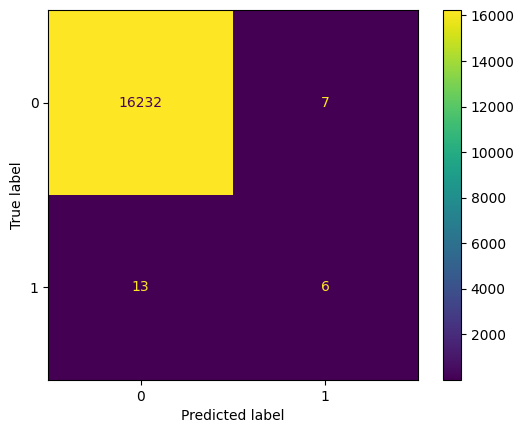

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=random_seed)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_val)

plot_metrics(y_pred)

The classifier falsley classified over half of the fraud instances, which means that it would do a poor job at predicting fraud in the real world. Below, a grid search is performed to try and increase the model's recall score: 

Accuracy: 0.98
Precision: 0.04
Recall: 0.84
F1 Score: 0.08


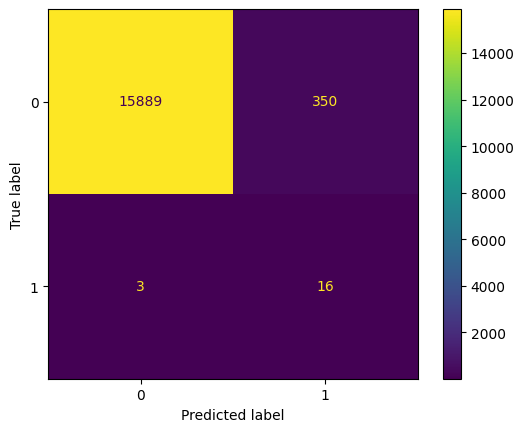

In [23]:
params = {
    "max_depth": [5, 10],
    "min_samples_split": [10, 20],
    "min_samples_leaf": [5, 10],
    "max_leaf_nodes": [25, 50],
}

metrics = ["recall", "accuracy"]
dtc_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed), param_grid=params, scoring=metrics, refit="recall")

dtc_grid.fit(X_train, y_train)
y_pred = dtc_grid.predict(X_val)

plot_metrics(y_pred)

While the model caught more instances of fraud, the number of false positives increased by a very large margin. Neither model seems to be a great predictor of fraud in the data. 

#### Random Forest

The random forest classifier is an ensemble method made up of multiple decision trees, using the predictions from each tree to make it's final prediction. The number of decision trees is 100 by default but this can be modified with a hyperparameter. Below, the base random forest classifier is created:  

Accuracy: 1.0
Precision: 1.0
Recall: 0.37
F1 Score: 0.54


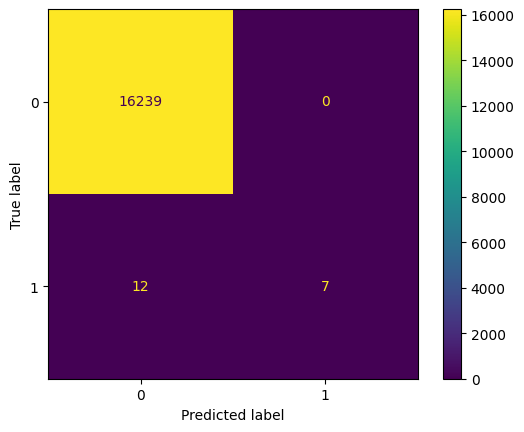

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=random_seed)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

plot_metrics(y_pred)

Once again, the model has a good precision score. While the recall score is better than the base decision tree model, it still misses over half of the fraud instances. Because random forests are made up of decision trees, some of the optimal hyperparameters from the decision tree grid search can be used in the training of the random forest. All applicable hyperparameters are listed below: 

In [25]:
dtc_grid.best_params_ # from dtc_grid model

{'max_depth': 10,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

These are then passed to the random forest grid search below, along with the hyperparameter that sets the number of distinct decision trees within the random forest: 

Accuracy: 0.99
Precision: 0.1
Recall: 0.84
F1 Score: 0.17


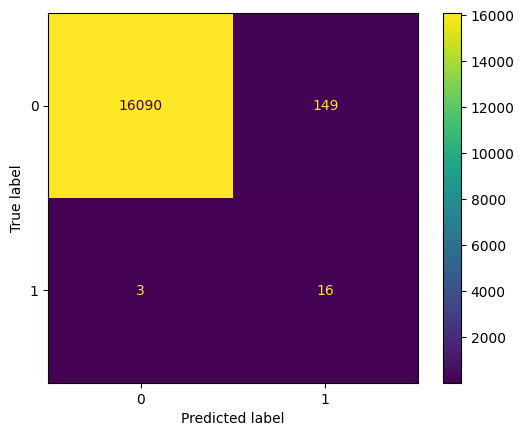

In [33]:
params = {
    "n_estimators": [x for x in range(80, 121, 10)],
    
    # The parameters below were taken from the dtc_grid best_params_
    'max_depth': [10],
    'max_leaf_nodes': [25],
    'min_samples_leaf': [5],
    'min_samples_split': [10],
}

metrics = ["recall", "accuracy"]
rfc_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=random_seed), param_grid=params, scoring=metrics, refit="recall")
rfc_grid.fit(X_train, y_train)
y_pred = rfc_grid.predict(X_val)

plot_metrics(y_pred)

The model's precision dropped, but it is worth the increase in recall. Now, the model only misses 3 of the fraud instances. While this result is not optimal, it is an improvement over the base random forest classifier. 

#### MLP Classifier

The final model to be created is the MLP classifier, which is a neural network. Below, a base model is trained but no grid search is performed: 

Accuracy: 0.98
Precision: 0.05
Recall: 0.84
F1 Score: 0.09


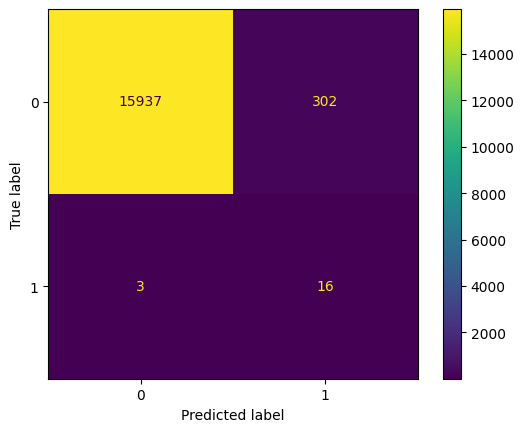

In [27]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(max_iter=400, random_state=random_seed)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_val)

plot_metrics(y_pred)

While this model didn't predict all the fraud instances, it had a recall score of 0.84 and performed better than the decision tree and random forest models. 

## Testing the Models

With the training complete and the best versions of each model determined through validation, the testing can begin. This will show how well the model performs on data that each model hasn't seen yet. Before, the testing starts, a new function will be defined for plotting the metrics when predicting the test data: 

In [28]:
def plot_metrics_test(model, threshold=None):
    y_pred = model.predict(X_test) # Using the test data

    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    print("Precision:", round(precision_score(y_test, y_pred), 2))
    print("Recall:", round(recall_score(y_test, y_pred), 2))
    print("F1 Score:", round(f1_score(y_test, y_pred), 2)),

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
    disp.plot()

Below, each model is tested and the metrics are displayed: 

Accuracy: 0.93
Precision: 0.02
Recall: 0.96
F1 Score: 0.03


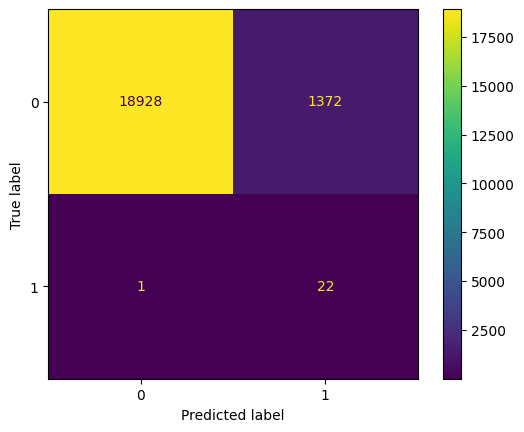

In [29]:
plot_metrics_test(lr)

Accuracy: 0.98
Precision: 0.04
Recall: 0.78
F1 Score: 0.07


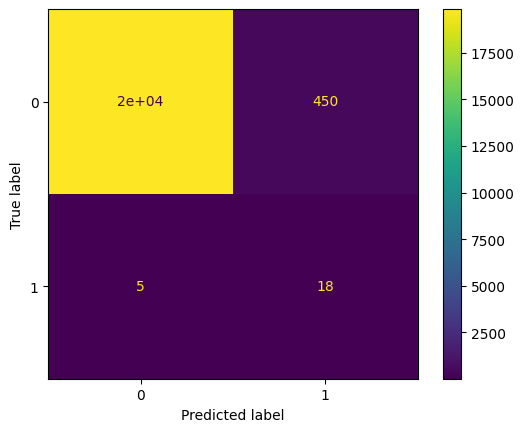

In [30]:
plot_metrics_test(dtc_grid)

Accuracy: 0.99
Precision: 0.08
Recall: 0.78
F1 Score: 0.15


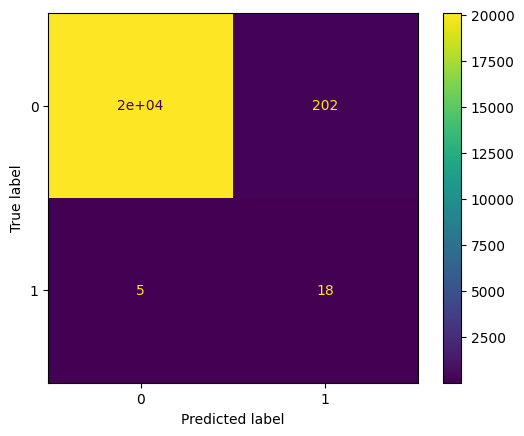

In [34]:
plot_metrics_test(rfc_grid)

Accuracy: 0.98
Precision: 0.04
Recall: 0.78
F1 Score: 0.08


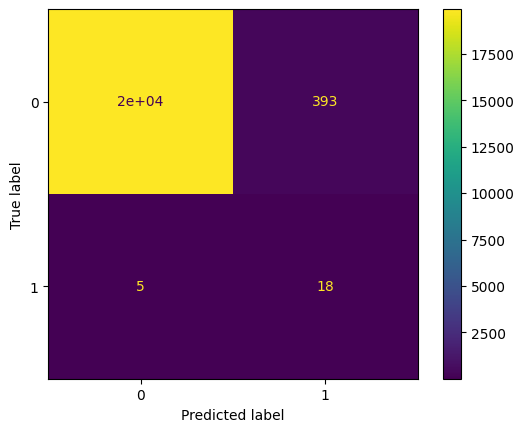

In [32]:
plot_metrics_test(nn)

## Conclusion

In the end, the optimal model was the logistic regression classifier. It caught nearly all the fraud instances, but unfourtunately still had a high number of false positives. This means that customers will be falsely notified of fraud in many instances when no fraud occured. The random forest grid had a low number of false positives and only missed 5 of the fraud instances. This might be a good model to optimize to see if the recall score can be increased. 

While these results are not optimal, they do show that machine learning models are capable of picking up patterns in banking fraud. Hopefully the field of data science can help make fraud a thing of the past in the financial sector.

## References 

CSN Annual Data Book 2023. 2024. Consumer Sentinel Network: Data Book 2023. Federal Trade Commission (FTC). https://www.ftc.gov/system/files/ftc_gov/pdf/CSN-Annual-Data-Book-2023.pdf 

gopalm-ai. Fraud Detection Example. Kaggle. https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example 